In [178]:
import numpy as np

# Generating linearly separable data

In [179]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20, n_informative=1, n_redundant=0)

In [180]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


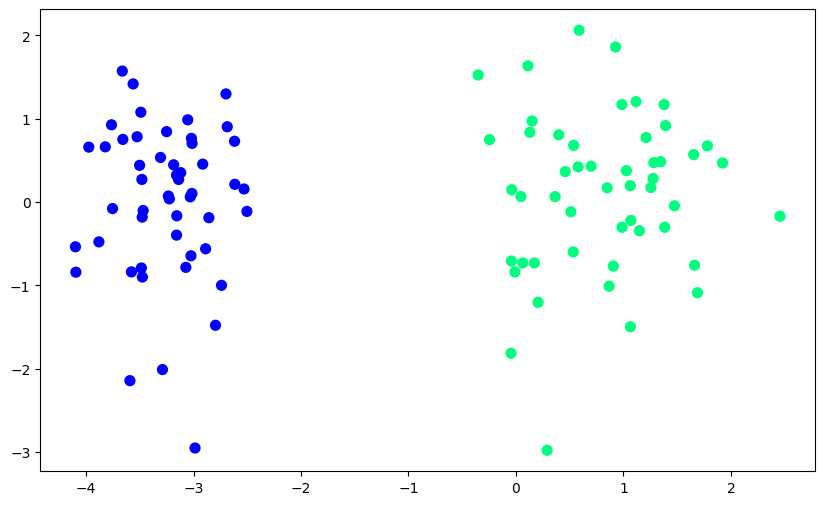

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter', s=50)

# Logistic Regression from Sklearn

In [182]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)
print(lor.intercept_)
print(lor.coef_)

[5.77576001]
[[4.7989524  0.20379838]]


C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [183]:
w0 = lor.intercept_[0]
w1 = lor.coef_[0][0]
w2 = lor.coef_[0][1]

m1 = -(w1/w2)
b1 = -(w0/w2)

In [184]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1 * x_input1 + b1

In [185]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [186]:
def gd(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5
  epochs=2500

  for i in range(2500):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + lr * np.dot((y - y_hat) , X) / X.shape[0]
  return weights[0],weights[1],weights[2]

In [187]:
w0,w1,w2=gd(X,y)

m2 = -(w1/w2)
b2 = -(w0/w2)

In [188]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m2 * x_input2 + b2

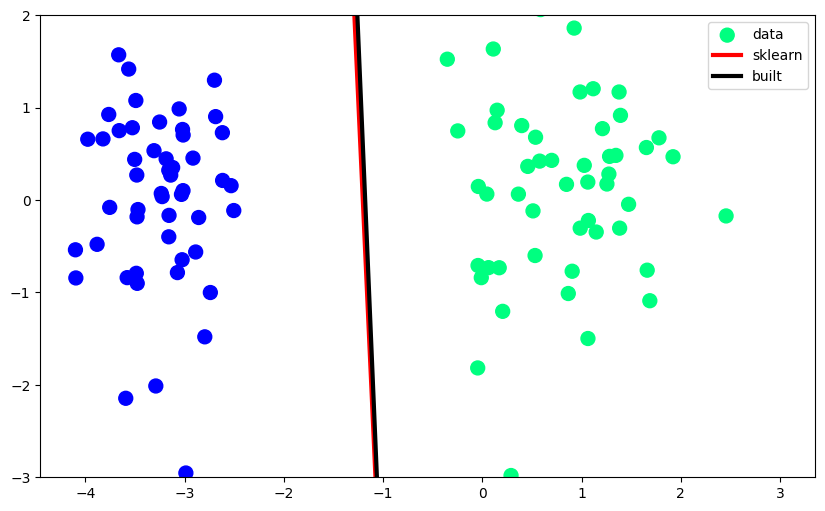

In [190]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter' ,label='data',s=100)
plt.plot(x_input1,y_input1, color='red', label='sklearn',linewidth=3)
plt.plot(x_input2,y_input2, color='black', label='built',linewidth=3)
plt.ylim(-3,2)
plt.legend()